# Training
> train a model

### The config file

It's also located [here](https://huggingface.co/parlance-labs/hc-mistral-alpaca/blob/main/configs/hc.yml)

In [1]:
!cat hc.yml

base_model: mistralai/Mistral-7B-v0.1
model_type: MistralForCausalLM
tokenizer_type: LlamaTokenizer
is_mistral_derived_model: true

load_in_8bit: false
load_in_4bit: true
strict: false

lora_fan_in_fan_out: false
data_seed: 49
seed: 49

datasets:
  - path: sample_data/alpaca_synth_queries.jsonl
    type: sharegpt
    conversation: alpaca
dataset_prepared_path: last_run_prepared
val_set_size: 0.1
output_dir: ./qlora-alpaca-out
hub_model_id: hamel/hc-mistral-alpaca

adapter: qlora
lora_model_dir:

sequence_len: 896
sample_packing: false
pad_to_sequence_len: true

lora_r: 32
lora_alpha: 16
lora_dropout: 0.05
lora_target_linear: true
lora_fan_in_fan_out:
lora_target_modules:
  - gate_proj
  - down_proj
  - up_proj
  - q_proj
  - v_proj
  - k_proj
  - o_proj

wandb_project: hc-axolotl-mistral
wandb_entity: hamelsmu

gradient_accumulation_steps: 4
micro_batch_size: 16
eval_batch_size: 16
num_epochs: 3
optimizer: adamw_bnb_8bit
lr_scheduler: cosine
learning_rate: 0.0002
max_grad_norm: 1.0
ada

## Train Command

```bash
accelerate launch -m axolotl.cli.train simple.yml
```

We can see the logs [here](https://wandb.ai/hamelsmu/hc-axolotl-mistral/runs/et2e62s4?workspace=user-hamelsmu).

We will discuss `accelerate` a bit later.

## W&B Experiments

I used Weights & Biases to track my various fine tuning experiments.  You can view [them here](https://wandb.ai/hamelsmu/hc-axolotl-mistral?workspace=user-hamelsmu).  

In each experiment, you can navigate to files, and view the axolotl config. Here is a screenshot of where this is located:

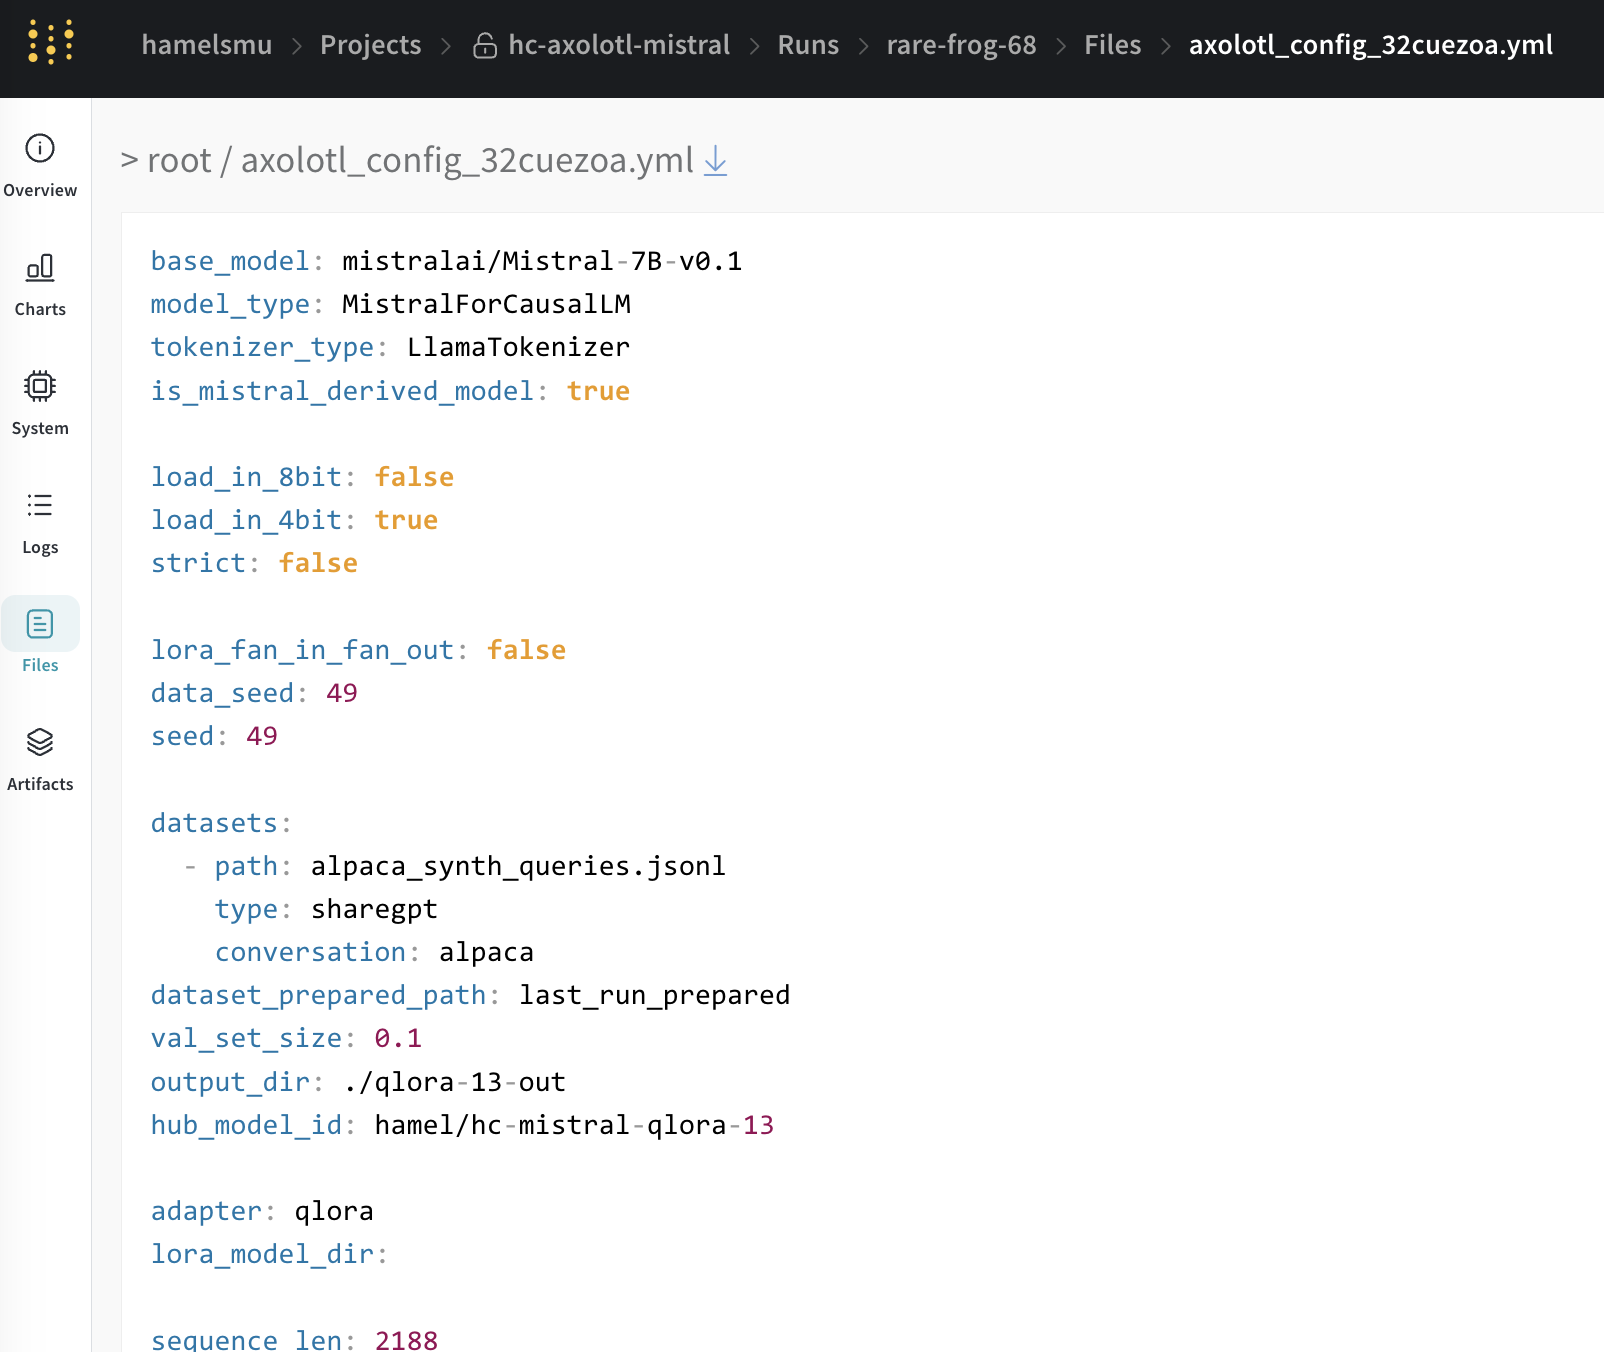


## Approach

I tried different parameters.

- Varying the learning rates
- Learning rate schedulers
- Distributed schemes (Deepspeed Stage Zero/Three)
- Batch Sizes
- Sample Packing vs Not Sample Packing

Ultimately, I chose the best approach according to eval loss.  This is not necessarily the best approach but is an ok proxy for the time being.  The best run according to eval loss is [this one](https://wandb.ai/hamelsmu/hc-axolotl-mistral/runs/et2e62s4?workspace=user-hamelsmu).

Feel free to peruse the W&B project for more metrics.

## Model Artifacts

The HuggingFace repo: [parlance-labs/hc-mistral-alpaca](https://huggingface.co/parlance-labs/hc-mistral-alpaca) are where the final weights are uploaded to.